In [13]:
import pandas as pd
import numpy as np
import keras
import os

# from tensorflow.keras.layers import Layer
# from tensorflow.keras.layers import Embedding, Input, Dense, LSTM, GRU, Bidirectional, TimeDistributed, Dropout
# from tensorflow.keras import initializers as initializers, regularizers, constraints
# from tensorflow.keras import backend as K

from keras.layers import Layer
from keras.layers import Embedding, Input, Dense, LSTM, GRU, Bidirectional, TimeDistributed, Dropout
from keras import initializers as initializers, regularizers, constraints
from keras import backend as K
from keras.models import Model
from textblob import TextBlob

In [2]:
import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
from keras.preprocessing.text import Tokenizer,  text_to_word_sequence

In [4]:
import tensorflow as tf

print(tf.VERSION)

1.13.1


In [5]:
list_of_lists = []

with open('short/train_positive.txt') as f:
    for line in f:
        inner_list = line.splitlines()
        list_of_lists.append(inner_list)
df_tr0 = pd.DataFrame(list_of_lists)
df_tr0.columns=['tweet']
df_tr0['label']=0
df_tr0

,tweet,label
0,"<user> you're welcome actly i ytd also no hw ,...",0
1,lowkey relationships last longer . it helps we...,0
2,"<user> amazing food ? ? well , we have have sc...",0
3,"to see our updates on your newsfeed , please e...",0
4,<user> what it sounds like ! ! ! ha jk ... the...,0
...,...,...
97995,""" <user> <user> i'm rick james itch . bitccchh...",0
97996,always ( rt <user> <user> have faith and keep ...,0
97997,<user> <user> <user> <user> <user> morning boy...,0
97998,gonna get into something since im off,0


In [6]:
list_of_lists = []

with open('short/train_negative.txt') as f:
    for line in f:
        inner_list = line.splitlines()
        list_of_lists.append(inner_list)
df_tr1 = pd.DataFrame(list_of_lists)
df_tr1.columns=['tweet']
df_tr1['label']=1

list_of_lists = []

with open('short/test_positive.txt') as f:
    for line in f:
        inner_list = line.splitlines()
        list_of_lists.append(inner_list)
df_ts0 = pd.DataFrame(list_of_lists)
df_ts0.columns=['tweet']
df_ts0['label']=0

list_of_lists = []

with open('short/test_negative.txt') as f:
    for line in f:
        inner_list = line.splitlines()
        list_of_lists.append(inner_list)
df_ts1 = pd.DataFrame(list_of_lists)
df_ts1.columns=['tweet']
df_ts1['label']=1


In [7]:
df_tr= pd.concat([df_tr0, df_tr1])
df_ts = pd.concat([df_ts0,df_ts1])
print(df_tr.shape, df_ts.shape)

(196000, 2) (4000, 2)


In [8]:
df_tr= pd.concat([df_tr, df_ts])
print(df_tr.shape)

(200000, 2)


In [9]:
df_tr.tweet = df_tr.tweet.astype(str)
type(df_tr.tweet)

pandas.core.series.Series

In [14]:
def form_sentence(tweet):
    tweet_blob = TextBlob(tweet)
    return ' '.join(tweet_blob.words)

In [15]:
def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet

In [16]:
df_tr['tweet']=df_tr['tweet'].apply(form_sentence)
trlist=df_tr.tweet.tolist()

In [17]:
max_features=200000
max_senten_len=40
max_senten_num=6
embed_size=100
VALIDATION_SPLIT = 0.2

In [18]:
from sklearn.utils import shuffle

In [19]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   tweet   200000 non-null  object
 1   label   200000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.6+ MB


In [31]:
categories = df_tr['label']
text = df_tr['tweet']

In [21]:
# cates = df_tr.groupby('label')
# print("total categories:", cates.ngroups)
# print(cates.size())

In [22]:
import re
def clean_str(string):
    """
    Tokenization/string cleaning for dataset
    Every dataset is lower cased except
    """
    string = re.sub(r"\\", "", string)    
    string = re.sub(r"\'", "", string)    
    string = re.sub(r"\"", "", string)    
    return string.strip().lower()

In [23]:
paras = []
labels = []
texts = []

In [24]:
from nltk import tokenize
sent_lens = []
sent_nums = []
for idx in range(df_tr.tweet.shape[0]):
    text = trlist[idx]
    texts.append(text)
    sentences = tokenize.sent_tokenize(text)
    sent_nums.append(len(sentences))
    for sent in sentences:
        sent_lens.append(len(text_to_word_sequence(sent)))
    paras.append(sentences)
    

In [25]:
tokenizer = Tokenizer(num_words=max_features, oov_token=True)
tokenizer.fit_on_texts(texts)

In [26]:
data = np.zeros((len(texts), max_senten_num, max_senten_len), dtype='int32')
for i, sentences in enumerate(paras):
    for j, sent in enumerate(sentences):
        if j< max_senten_num:
            wordTokens = text_to_word_sequence(sent)
            k=0
            for _, word in enumerate(wordTokens):
                try:
                    if k<max_senten_len and tokenizer.word_index[word]<max_features:
                        data[i,j,k] = tokenizer.word_index[word]
                        k=k+1
                except:
                    print(word)
                    pass

In [27]:
sent_lens = []
sent_nums = []
for idx in range(df_tr.tweet.shape[0]):
    text = trlist[idx]
    texts.append(text)
    sentences = tokenize.sent_tokenize(text)
    sent_nums.append(len(sentences))
    for sent in sentences:
        sent_lens.append(len(text_to_word_sequence(sent)))
    paras.append(sentences)

In [28]:
data.shape

(200000, 6, 40)

In [29]:
word_index = tokenizer.word_index
print('Total %s unique tokens.' % len(word_index))

Total 100734 unique tokens.


In [32]:
labels = pd.get_dummies(categories)

In [33]:
print('Shape of data tensor:', data.shape)
print('Shape of labels tensor:', labels.shape)

Shape of data tensor: (200000, 6, 40)
Shape of labels tensor: (200000, 2)


In [34]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels.iloc[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]
print('Number of positive and negative reviews in traing and validation set')
print(y_train.columns.tolist())
print(y_train.sum(axis=0).tolist())
print(y_val.sum(axis=0).tolist())

Number of positive and negative reviews in traing and validation set
[0, 1]
[79960, 80040]
[20040, 19960]


In [35]:
REG_PARAM = 1e-13
l2_reg = regularizers.l2(REG_PARAM)

In [36]:
import os

In [37]:
GLOVE_DIR = "glove.6B\glove.6B.300d.txt"
embeddings_index = {}
f = open(GLOVE_DIR, encoding='utf8')
for line in f:
    try:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    except:
        print(word)
        pass
f.close()
print('Total %s word vectors.' % len(embeddings_index))

Total 400000 word vectors.


In [38]:
embed_size=300
embedding_matrix = np.zeros((len(word_index) + 1, embed_size))
absent_words = 0
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        absent_words += 1
print('Total absent words are', absent_words, 'which is', "%0.2f" % (absent_words * 100 / len(word_index)), '% of total words')

Total absent words are 49552 which is 49.19 % of total words


In [42]:
# texts = []
# for i in range(df_tr.shape[0]):
#     s = df_tr['tweet'].iloc[i]
#     #s = ' '.join([word.strip(string.punctuation) for word in s.split() if word.strip(string.punctuation) is not ""])
#     texts.append(s)
# tokenizer = keras.preprocessing.text.Tokenizer(num_words=MAX_FEATURES,lower=True, oov_token=None)
# tokenizer.fit_on_texts(texts)
# word_index = tokenizer.word_index

# print('Number of tokens: ' + str(len(word_index)))

NameError: name 'MAX_FEATURES' is not defined

In [40]:
embeddings_index = {}
f = open(os.path.join(os.getcwd(), 'glove.6B\glove.6B.300d.txt'), encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [41]:
EMBED_SIZE = 300

min_wordCount = 2
absent_words = 0
small_words = 0
embedding_matrix = np.zeros((len(word_index) + 1, EMBED_SIZE))
word_counts = tokenizer.word_counts
for word, i in word_index.items():
    if word_counts[word] > min_wordCount:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector
        else:
            absent_words += 1
    else:
        small_words += 1
print('Total absent words are', absent_words, 'which is', "%0.2f" % (absent_words * 100 / len(word_index)),
      '% of total words')
print('Words with '+str(min_wordCount)+' or less mentions', small_words, 'which is', "%0.2f" % (small_words * 100 / len(word_index)),
      '% of total words')
print(str(len(word_index)-small_words-absent_words) + ' words to proceed.')

KeyError: True

In [13]:
embedding_matrix[word_index['great']]


array([ 0.23188999, -0.19536   ,  0.033388  , -0.26135001,  0.51484001,
        0.39276001,  0.10469   ,  0.057854  , -0.24567001, -1.56009996,
        0.20387   , -0.26492   , -0.44075999,  0.46224999, -0.15718   ,
        0.20169   , -0.26477   , -0.16019   , -0.38192001,  0.66452998,
       -0.075429  ,  0.30939999,  0.011754  ,  0.0073894 ,  0.10262   ,
       -0.01462   , -0.34276   ,  0.0054704 ,  0.29089999,  0.15917   ,
       -0.025582  ,  0.36114001, -0.94572997,  0.034111  , -1.11389995,
        0.093299  , -0.30590999,  0.38655001,  0.04631   , -0.0087563 ,
        0.035591  , -0.51230001, -0.013579  , -0.14050999,  0.17067   ,
        0.38446999,  0.78362   ,  0.66696   ,  0.066587  , -0.35587001,
        0.38653001, -0.46603   , -0.1972    , -0.20084   , -0.31101   ,
        0.56159002,  0.11281   ,  0.40764001,  0.38773999,  0.23275   ,
        0.54009002, -0.14222001,  0.48638001, -0.098057  , -0.17888001,
       -0.22547001, -0.31621999,  0.40327001, -0.35303   ,  0.03

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(df_tr['tweet'], df_tr['label'], test_size=0.2, random_state=42)
print(x_train.shape, x_val.shape )

(156800,) (39200,)


In [20]:
class AttentionLayer(Layer):
    """
    Hierarchial Attention Layer as described by Hierarchical Attention Networks for Document Classification(2016)
    - Yang et. al.
    Source: https://www.cs.cmu.edu/~hovy/papers/16HLT-hierarchical-attention-networks.pdf
    Theano backend
    """
    def __init__(self,attention_dim=100,return_coefficients=False,**kwargs):
        # Initializer 
        self.supports_masking = True
        self.return_coefficients = return_coefficients
        self.init = initializers.get('glorot_uniform') # initializes values with uniform distribution
        self.attention_dim = attention_dim
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        # Builds all weights
        # W = Weight matrix, b = bias vector, u = context vector
        assert len(input_shape) == 3
        self.W = K.variable(self.init((input_shape[-1], self.attention_dim)),name='W')
        self.b = K.variable(self.init((self.attention_dim, )),name='b')
        self.u = K.variable(self.init((self.attention_dim, 1)),name='u')
        self.trainable_weights = [self.W, self.b, self.u]

        super(AttentionLayer, self).build(input_shape)

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, hit, mask=None):
        # Here, the actual calculation is done
        uit = K.bias_add(K.dot(hit, self.W),self.b)
        uit = K.tanh(uit)
        
        ait = K.dot(uit, self.u)
        ait = K.squeeze(ait, -1)
        ait = K.exp(ait)
        
        if mask is not None:
            ait *= K.cast(mask, K.floatx())

        ait /= K.cast(K.sum(ait, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        ait = K.expand_dims(ait)
        weighted_input = hit * ait
        
        if self.return_coefficients:
            return [K.sum(weighted_input, axis=1), ait]
        else:
            return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        if self.return_coefficients:
            return [(input_shape[0], input_shape[-1]), (input_shape[0], input_shape[-1], 1)]
        else:
            return input_shape[0], input_shape[-1]

In [122]:
def dot_product(x, kernel):
    """
    Wrapper for dot product operation, in order to be compatibl|e with both
    Theano and Tensorflow
    Args:
        x (): input
        kernel (): weights
    Returns:
    """
    if K.backend() == 'tensorflow':
        return K.squeeze(K.dot(x, K.expand_dims(kernel)), axis=-1)
    else:
        return K.dot(x, kernel)
    
class AttentionWithContext(Layer):
    """
    Attention operation, with a context/query vector, for temporal data.
    Supports Masking.
    Follows the work of Yang et al. [https://www.cs.cmu.edu/~diyiy/docs/naacl16.pdf]
    "Hierarchical Attention Networks for Document Classification"
    by using a context vector to assist the attention
    # Input shape
        3D tensor with shape: `(samples, steps, features)`.
    # Output shape
        2D tensor with shape: `(samples, features)`.
    How to use:
    Just put it on top of an RNN Layer (GRU/LSTM/SimpleRNN) with return_sequences=True.
    The dimensions are inferred based on the output shape of the RNN.
    Note: The layer has been tested with Keras 2.0.6
    Example:
        model.add(LSTM(64, return_sequences=True))
        model.add(AttentionWithContext())
        # next add a Dense layer (for classification/regression) or whatever...
    """
    def __init__(self,
                 W_regularizer=None, u_regularizer=None, b_regularizer=None,
                 W_constraint=None, u_constraint=None, b_constraint=None,
                 bias=True, **kwargs):

        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.u_regularizer = regularizers.get(u_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.u_constraint = constraints.get(u_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        super(AttentionWithContext, self).__init__(**kwargs)
        
    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1], input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        if self.bias:
            self.b = self.add_weight((input_shape[-1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)

        self.u = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_u'.format(self.name),
                                 regularizer=self.u_regularizer,
                                 constraint=self.u_constraint)

        super(AttentionWithContext, self).build(input_shape)
    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None
    def call(self, x, mask=None):
        uit = dot_product(x, self.W)

        if self.bias:
            uit += self.b

        uit = K.tanh(uit)
        ait = dot_product(uit, self.u)

        a = K.exp(ait)

        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())

        # in some cases especially in the early stages of training the sum may be almost zero
        # and this results in NaN's. A workaround is to add a very small positive number ε to the sum.
        # a /= K.cast(K.sum(a, axis=1, keepdims=True), K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)
    def compute_output_shape(self, input_shape):
        return input_shape[0], input_shape[-1]

In [124]:
embedding_layer = Embedding(len(word_index) + 1,embed_size,weights=[embedding_matrix], input_length=max_senten_len, trainable=False)

In [130]:
word_input = Input(shape=(max_senten_len,), dtype='float32')
word_sequences = embedding_layer(word_input)
word_lstm = Bidirectional(LSTM(150, return_sequences=True, kernel_regularizer=l2_reg))(word_sequences)
word_dense = TimeDistributed(Dense(200, kernel_regularizer=l2_reg))(word_lstm)
word_att = AttentionWithContext()(word_dense)
wordEncoder = Model(word_input, word_att)

sent_input = Input(shape=(max_senten_num, max_senten_len), dtype='float32')
sent_encoder = TimeDistributed(wordEncoder)(sent_input)
sent_lstm = Bidirectional(LSTM(150, return_sequences=True, kernel_regularizer=l2_reg))(sent_encoder)
sent_dense = TimeDistributed(Dense(200, kernel_regularizer=l2_reg))(sent_lstm)
sent_att = Dropout(0.5)(AttentionWithContext()(sent_dense))
preds = Dense(2, activation='sigmoid')(sent_att)
model = Model(sent_input, preds)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [127]:
from keras.callbacks import Callback, ModelCheckpoint

In [131]:
checkpoint = ModelCheckpoint('best_model.h5', verbose=0, monitor='val_loss',save_best_only=True, mode='auto') 

In [132]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=64, callbacks=[checkpoint])

Instructions for updating:
Use tf.cast instead.
Train on 156800 samples, validate on 39200 samples
Epoch 1/5
156800/156800 [==============================] - 3154s 20ms/step - loss: 0.4597 - acc: 0.7695 - val_loss: 0.4022 - val_acc: 0.8063
Epoch 2/5
156800/156800 [==============================] - 3168s 20ms/step - loss: 0.3873 - acc: 0.8195 - val_loss: 0.3790 - val_acc: 0.8222
Epoch 3/5
156800/156800 [==============================] - 2823s 18ms/step - loss: 0.3525 - acc: 0.8387 - val_loss: 0.3802 - val_acc: 0.8254
Epoch 4/5
156800/156800 [==============================] - 2507s 16ms/step - loss: 0.3197 - acc: 0.8573 - val_loss: 0.3692 - val_acc: 0.8330
Epoch 5/5
156800/156800 [==============================] - 2477s 16ms/step - loss: 0.2849 - acc: 0.8751 - val_loss: 0.3796 - val_acc: 0.8321


In [133]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [134]:
import matplotlib.pyplot as plt

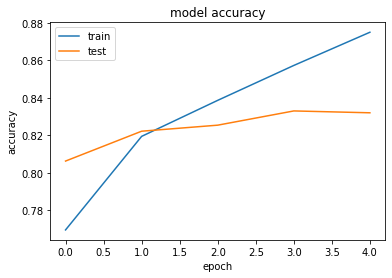

In [135]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

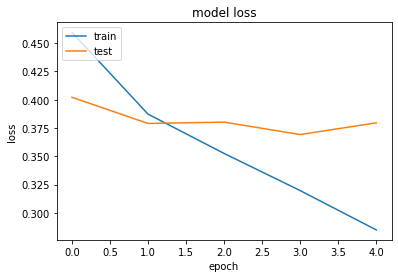

In [136]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [137]:
model.save('han.h5')

In [138]:
df_ts['tweet']=df_ts['tweet'].apply(form_sentence)
tslist=df_ts.tweet.tolist()

In [139]:
paras = []
labels = []
texts = []

In [140]:
sent_lens = []
sent_nums = []
for idx in range(df_ts.tweet.shape[0]):
    text = tslist[idx]
    texts.append(text)
    sentences = tokenize.sent_tokenize(text)
    sent_nums.append(len(sentences))
    for sent in sentences:
        sent_lens.append(len(text_to_word_sequence(sent)))
    paras.append(sentences)

In [142]:
tokenizer = Tokenizer(num_words=max_features, oov_token=True)
tokenizer.fit_on_texts(texts)

In [143]:
data = np.zeros((len(texts), max_senten_num, max_senten_len), dtype='int32')
for i, sentences in enumerate(paras):
    for j, sent in enumerate(sentences):
        if j< max_senten_num:
            wordTokens = text_to_word_sequence(sent)
            k=0
            for _, word in enumerate(wordTokens):
                try:
                    if k<max_senten_len and tokenizer.word_index[word]<max_features:
                        data[i,j,k] = tokenizer.word_index[word]
                        k=k+1
                except:
                    print(word)
                    pass

In [144]:
data.shape

(4000, 6, 40)

In [145]:
pred=model.predict(data)

In [148]:
p=np.asarray(pred)
p.shape

(4000, 2)

In [150]:
plabel=np.argmax(p, axis=1)
plabel.shape

(4000,)

In [151]:
plabel

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [152]:
gt=df_ts.label

In [153]:
from sklearn.metrics import accuracy_score
accuracy_score(gt, plabel)

0.60925

In [154]:
np.savetxt('prediction1.csv', plabel, delimiter=',')